In [1]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline

In [2]:
df1 = pd.read_csv("honda_car_selling.csv")
df1.head()

,Year,kms Driven,Fuel Type,Suspension,Price,Car Model
0,2019,19006 kms,Petrol,Automatic,9.29 Lakh,Honda City V CVT
1,2021,11936 kms,Petrol,Automatic,13.95 Lakh,Honda City ZX CVT
2,2018,29635 kms,Petrol,Automatic,9.95 Lakh,Honda City i-VTEC CVT ZX
3,2020,16163 kms,Petrol,Automatic,13.26 Lakh,Honda City ZX CVT
4,2015,105114 kms,Petrol,Manual,5.68 Lakh,Honda City i VTEC V


In [3]:
backup = df1.copy()

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        999 non-null    int64 
 1   kms Driven  999 non-null    object
 2   Fuel Type   999 non-null    object
 3   Suspension  999 non-null    object
 4   Price       999 non-null    object
 5   Car Model   999 non-null    object
dtypes: int64(1), object(5)
memory usage: 47.0+ KB


In [5]:
df1.shape

(999, 6)

In [6]:
df1["Year"].unique()

array([2019, 2021, 2018, 2020, 2015, 2016, 2014, 2017, 2022, 2013, 2012,
       2010, 2011, 2008, 2009, 2023, 2007, 2005, 2004, 2003, 2006, 2000],
      dtype=int64)

In [7]:
df1["kms Driven"] = df1["kms Driven"].str.strip()

In [8]:
df1["kms Driven"] = df1["kms Driven"].str.split().str.get(0)

In [9]:
df1["kms Driven"] = df1["kms Driven"].astype(int)

In [10]:
df1["Fuel Type"].unique()

array([' Petrol ', ' Diesel ', ' CNG '], dtype=object)

In [11]:
df1["Fuel Type"] = df1["Fuel Type"].str.strip()

In [12]:
df1["Suspension"].unique()

array([' Automatic', ' Manual'], dtype=object)

In [13]:
df1["Suspension"] = df1["Suspension"].str.strip()

In [14]:
df1["Price"] = df1["Price"].str.strip()

In [15]:
def price_cleaner(values):
    output = values.split()
    result = [eval(i) for i in output]
    return np.prod(result)

df1["Price"] = df1["Price"].str.strip()
df1["Price"] = df1["Price"].str.replace(',','')
df1["Price"] = df1["Price"].str.replace('Lakh','100000')
df1["Price"] = df1["Price"].map(price_cleaner)

In [16]:
df1["Price"] = df1["Price"].astype(int)

In [17]:
df1["Car Model"] = df1["Car Model"].str.strip()

In [18]:
df1["Car Model"] = df1["Car Model"].str.split(" ").str.slice(start = 0,stop = 3).str.join(" ")

In [19]:
df1.to_csv("Cleaned_Car_Data.csv")

S:\ana\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 14.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
S:\ana\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 14.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
S:\ana\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 10.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
S:\ana\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 9.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\sid80\AppData\Local\Temp\ipykernel_17544\3042460771.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xtickla

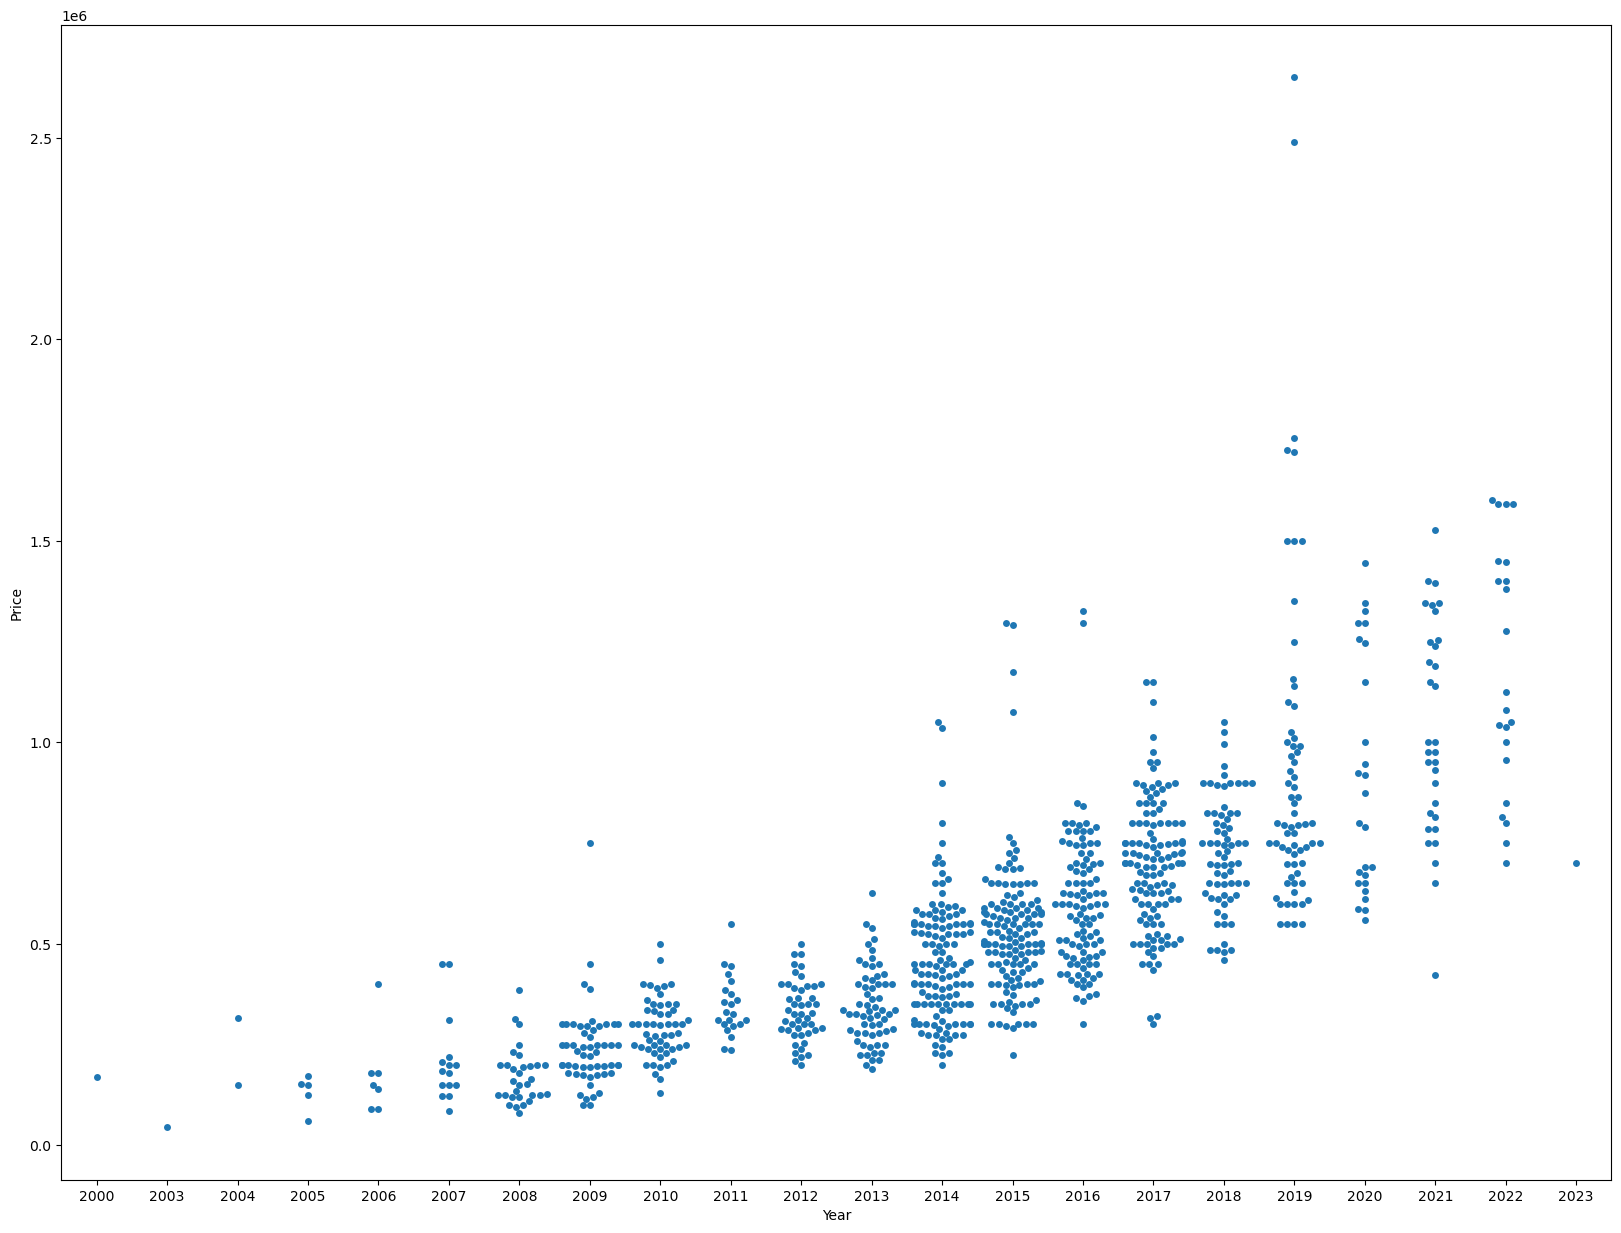

In [20]:
plt.figure(figsize = (20,15))
ax = sns.swarmplot(x = 'Year',y = 'Price',data = df1)
ax.set_xticklabels(ax.get_xticklabels())
plt.show()
warnings.filterwarnings('ignore')

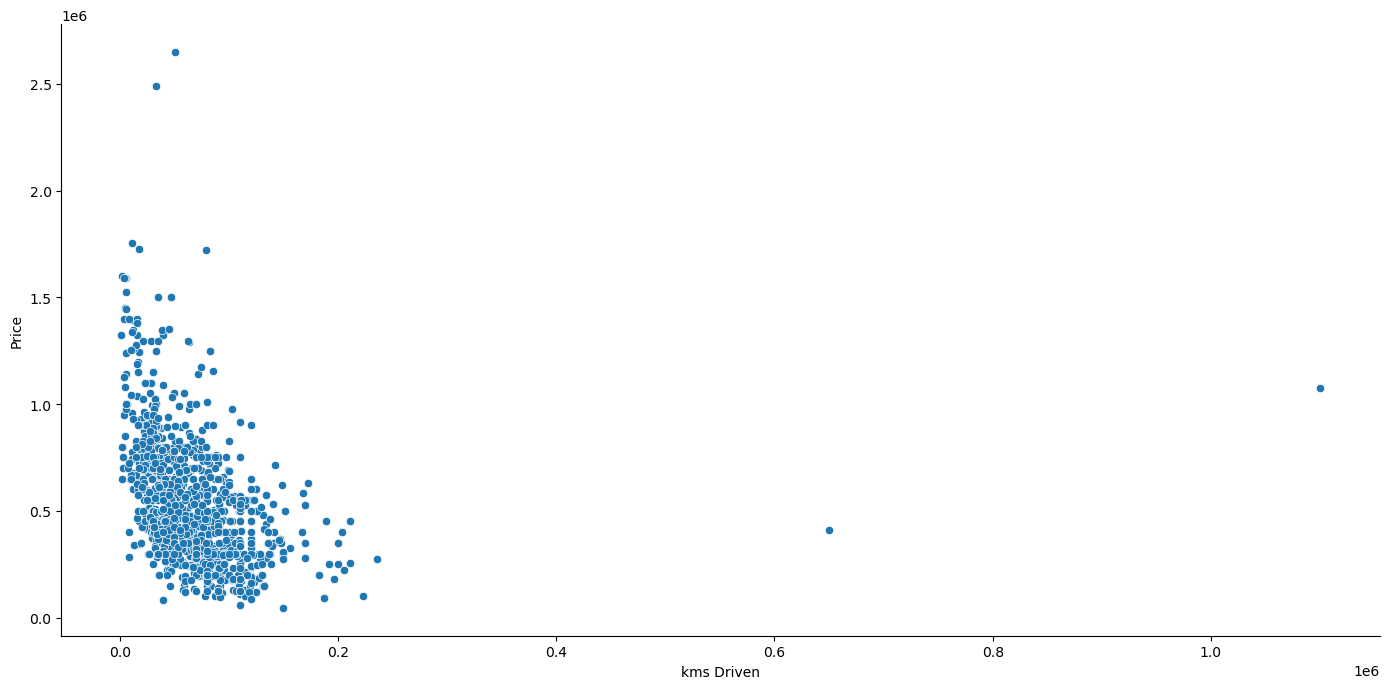

In [21]:
sns.relplot(x = 'kms Driven',y = 'Price',data = df1,height = 7,aspect = 2)
warnings.filterwarnings('ignore')

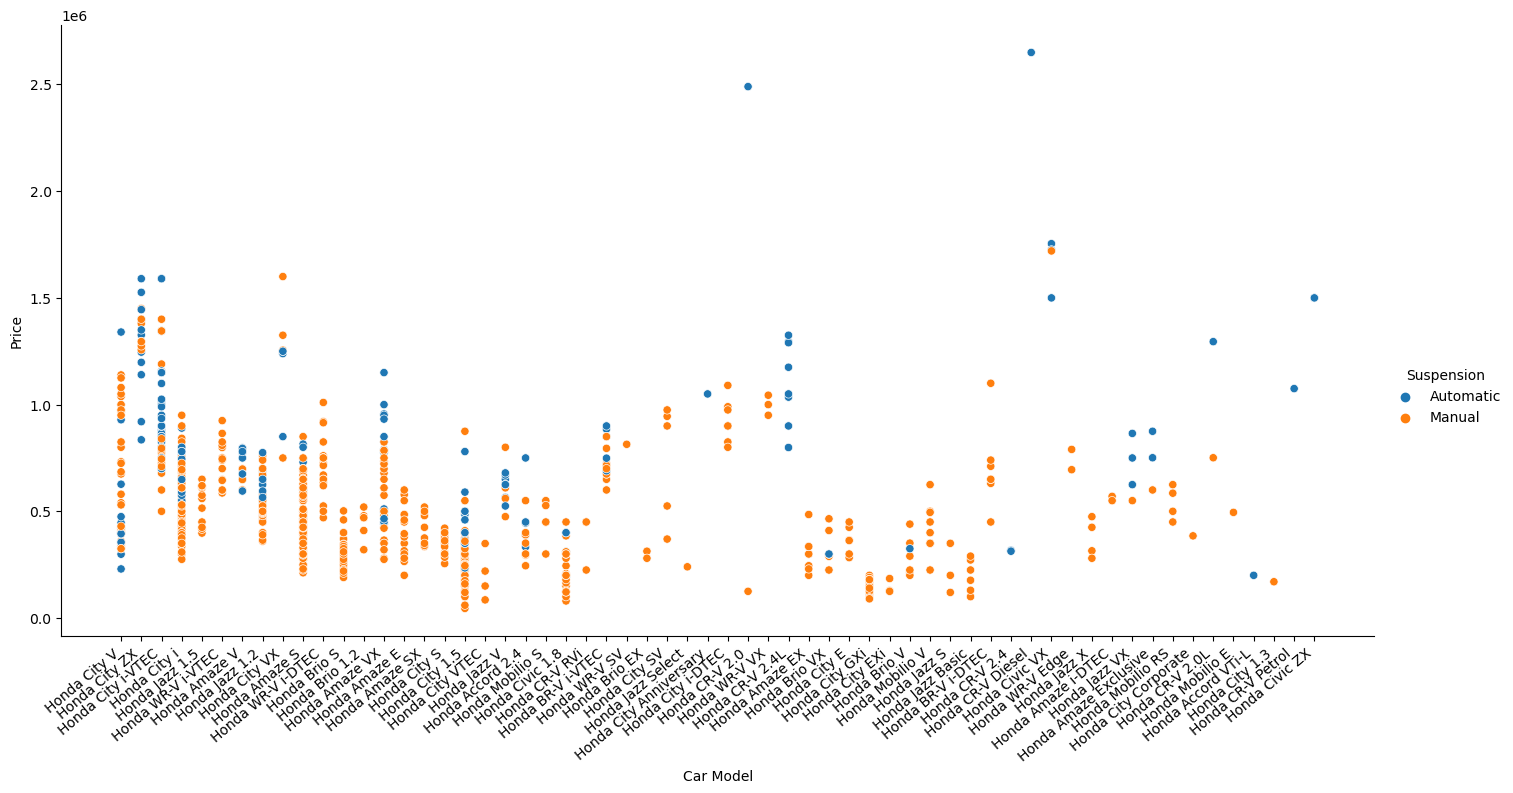

In [22]:
ax = sns.relplot(x = 'Car Model',y = 'Price',data = df1,hue = 'Suspension',height = 7,aspect = 2)
ax.set_xticklabels(rotation = 40,ha = 'right')
warnings.filterwarnings('ignore')

In [23]:
dummies1 = pd.get_dummies(df1["Fuel Type"],dtype = "int")

In [24]:
fuel_dummies = pd.DataFrame(dummies1)
fuel_dummies.head()

,CNG,Diesel,Petrol
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1


In [25]:
df2 = pd.concat([df1,fuel_dummies],axis = "columns")

In [26]:
dummies2 = pd.get_dummies(df2["Suspension"],dtype = "int")

In [27]:
suspension_dummies = pd.DataFrame(dummies2)
suspension_dummies.head()

,Automatic,Manual
0,1,0
1,1,0
2,1,0
3,1,0
4,0,1


In [28]:
df3 = pd.concat([df2,suspension_dummies],axis = "columns")

In [29]:
dummies3 = pd.get_dummies(df3["Car Model"],dtype = "int")

In [30]:
car_dummies = pd.DataFrame(dummies3)
car_dummies.head()

,Honda Accord 2.4,Honda Accord VTi-L,Honda Amaze E,Honda Amaze EX,Honda Amaze Exclusive,Honda Amaze S,Honda Amaze SX,Honda Amaze V,Honda Amaze VX,Honda Amaze i-DTEC,...,Honda Jazz X,Honda Mobilio E,Honda Mobilio RS,Honda Mobilio S,Honda Mobilio V,Honda WR-V Edge,Honda WR-V SV,Honda WR-V VX,Honda WR-V i-DTEC,Honda WR-V i-VTEC
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
df4 = pd.concat([df3,car_dummies],axis = "columns")

In [32]:
df5 = df4.drop(["Fuel Type","Suspension","Car Model"],axis = "columns")
df5.head()

,Year,kms Driven,Price,CNG,Diesel,Petrol,Automatic,Manual,Honda Accord 2.4,Honda Accord VTi-L,...,Honda Jazz X,Honda Mobilio E,Honda Mobilio RS,Honda Mobilio S,Honda Mobilio V,Honda WR-V Edge,Honda WR-V SV,Honda WR-V VX,Honda WR-V i-DTEC,Honda WR-V i-VTEC
0,2019,19006,928999,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2021,11936,1395000,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2018,29635,994999,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2020,16163,1326000,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2015,105114,568000,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
df5.describe()

,Year,kms Driven,Price,CNG,Diesel,Petrol,Automatic,Manual,Honda Accord 2.4,Honda Accord VTi-L,...,Honda Jazz X,Honda Mobilio E,Honda Mobilio RS,Honda Mobilio S,Honda Mobilio V,Honda WR-V Edge,Honda WR-V SV,Honda WR-V VX,Honda WR-V i-DTEC,Honda WR-V i-VTEC
count,999.000000,9.990000e+02,9.990000e+02,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,...,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000
mean,2014.717718,6.607667e+04,5.530370e+05,0.001001,0.201201,0.797798,0.223223,0.776777,0.013013,0.001001,...,0.004004,0.001001,0.004004,0.005005,0.009009,0.002002,0.001001,0.003003,0.019019,0.018018
std,3.713756,5.310468e+04,3.030851e+05,0.031639,0.401099,0.401843,0.416615,0.416615,0.113387,0.031639,...,0.063182,0.031639,0.063182,0.070604,0.094535,0.044721,0.031639,0.054745,0.136660,0.133083
min,2000.000000,1.425000e+03,4.500000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2013.000000,3.534100e+04,3.265000e+05,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2015.000000,5.990000e+04,5.099990e+05,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2017.000000,8.528750e+04,7.000000e+05,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2023.000000,1.100000e+06,2.650000e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [34]:
df5 = df5[df5["kms Driven"]<150000]

In [35]:
df5 = df5[df5["Price"]<1000000]

In [36]:
X = df5.drop(["Price"],axis = "columns")
y = df5.Price

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 10)

In [38]:
from sklearn.ensemble import RandomForestRegressor

In [39]:
rf = RandomForestRegressor(n_estimators = 100)
rf.fit(X_train, y_train)

RandomForestRegressor()

In [41]:
from sklearn.metrics import r2_score
y_pred = rf.predict(X_test)
r2_score(y_test, y_pred)

0.7565496256311328

In [45]:
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor()
#A random forest regressor is an estimator that fits a number of classifying decision trees 
#on various sub-samples of the dataset and uses averaging to improve the prediction accuracy 
#and slos control over-fitting.
import numpy as np
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
#n_estimators is a parameter of the random forest regressor which is used to control no of trees in the forest
#so we use 100 200 ....1200 trees for the model
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [46]:
 #Randomized Search CV
# Number of features to consider at every split
max_features = ['auto', 'sqrt'] # we first consider all the featurees and 
#then sqare root number of features to train the model

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
#we create trees with 5 10 15 for each model...and train it

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# we split as 2 nodes forst then 5 then 10 like that till 100 from the list

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [47]:
max_depth

[5, 10, 15, 20, 25, 30]

In [48]:
from sklearn.model_selection import RandomizedSearchCV
#Randomized search on hyper parameters.
#used to select the best parameter for the model

In [49]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [50]:
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [51]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   2.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   2.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [52]:
predictions=rf_random.predict(X_test)
predictions1=rf_random.predict(X_train)

In [53]:
from sklearn.metrics import r2_score
r = r2_score(y_test, predictions)
print("R2 score : {}" . format(r))

R2 score : 0.7726480392047987
